In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy as sp

### Eigenvectors

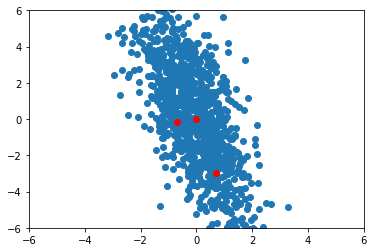

In [30]:
mean = np.array([0, 0])
Cov = np.array([[1, -2],
                [-2, 9]])

dist = np.random.multivariate_normal(mean, Cov, size = 1000)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.scatter(dist[:, 0], dist[:, 1])

x = np.array([-2, 2])

# plt.scatter(x[0], x[1], color = 'red')

# m_dist = np.sqrt(np.linalg.multi_dot([(x - mean), np.linalg.inv(Cov), (x - mean)]))

Cov
values, vectors = np.linalg.eig(Cov)

vectors_plot = vectors * np.sqrt(values) + mean
plt.scatter(mean[0], mean[1], color = 'red')
plt.scatter(vectors_plot[0, :], vectors_plot[1, :], color = 'red')


### Central Limit Theorem

(array([  2.,   3.,  13.,  65., 138., 220., 247., 188.,  89.,  35.]),
 array([0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7 , 0.73, 0.76, 0.79, 0.82]),
 <a list of 10 Patch objects>)

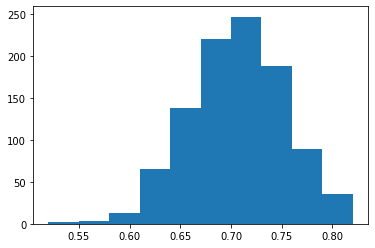

In [29]:
means = [np.mean([1 if r > .3 else 0 for r in np.random.random(size = 100)]) for _ in range(1000)]

plt.hist(means)

### Conditional Distribution - Height and Weight

In [32]:
means = np.array([165, 70])
cov = np.array([[550, 40],
                [40, 8]])

# Find Mean and Variance of weight for height of 75
cond_mean = means[0] + cov[0, 1] / cov[1, 1] * (75 - means[1])
cond_var = cov[0, 0] - cov[0, 1] ** 2 / cov[1, 1]

print(cond_mean, cond_var)

190.0 350.0


### Conditional Distribution - MPG

In [89]:
mpg = np.genfromtxt('./Data/Multivariate Stats/auto-mpg.csv', delimiter = ',', usecols = [0, 3, 4])

nan_idx = np.isnan(mpg)
mpg[nan_idx] = np.nanmean(mpg, axis = 0)[1]

mpg_c = mpg - np.mean(mpg, axis = 0)

mu = np.mean(mpg, axis = 0)
cov = np.dot(np.transpose(mpg_c), mpg_c) / mpg.shape[0]

stdev = np.diag(np.sqrt(np.diag(cov)))

corr = np.linalg.multi_dot([np.linalg.inv(stdev), cov, np.linalg.inv(stdev)])

# Find Correlation of Horsepower and Weight when MPG = 32

hp_mean = mu[1] + cov[0, 1] / cov[0, 0] * (35 - mu[0])
weight_mean = mu[2] + cov[0, 2] / cov[0, 0] * (35 - mu[0])

hp_var = cov[1, 1] - cov[0, 1] ** 2 / cov[0, 0]
weight_var = cov[2, 2] - cov[0, 2] ** 2 / cov[0, 0]

corr_fixed_mpg = cov[1, 2] / (hp_var * weight_var)

corr_fixed_mpg

0.0002137226736089872

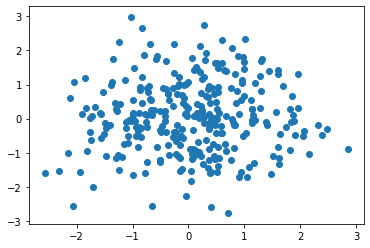

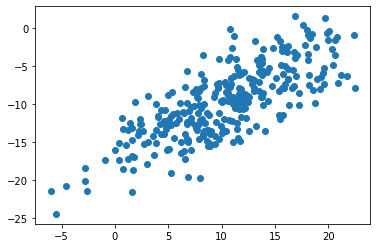

In [100]:
mean = np.array([10, -10])
cov = np.array([[5, 2],
                [2, 4]])

points = np.random.normal(size = [300, 2])
plt.figure(0)
plt.scatter(points[:, 0], points[:, 1])

new_points = np.dot(points, cov) + mean
plt.figure(1)
plt.scatter(new_points[:, 0], new_points[:, 1])